<a href="https://colab.research.google.com/github/suruanush/MobiusStrip/blob/main/anush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!git clone https://github.com/suruanush/MobiusStrip.git

fatal: destination path 'MobiusStrip' already exists and is not an empty directory.


Generated mesh with dimensions: x=(100, 100), y=(100, 100), z=(100, 100)
Approximate Surface Area: 12.8562
Approximate Edge Length: 12.6673


<ipython-input-20-720e7e551f87>:88: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  edge_length = np.trapz(magnitude_derivative, self.u)


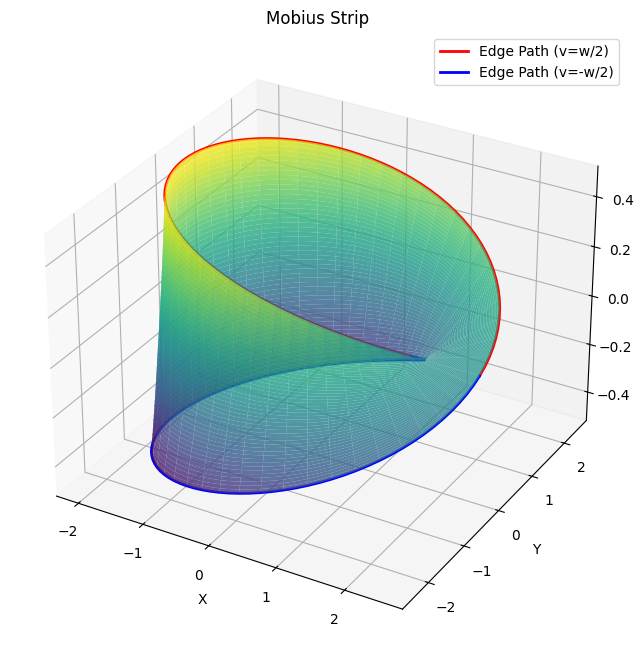

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import art3d

class MobiusStrip:
    def __init__(self, R, w, n):

        self.R = R
        self.w = w
        self.n = n

        # Define the parameter ranges for u and v.
        # u spans 0 to 2*pi , v spans -w/2 to w/2 .
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)

        # Create a meshgrid from u and v to compute points across the entire surface.
        self.U, self.V = np.meshgrid(self.u, self.v)

        # (x, y, z) coordinates for the Mobius strip's surface.
        self.x, self.y, self.z = self._compute_mesh()

    def _compute_mesh(self):

        # 3D mesh points of the Mobius strip using its parametric equations.
        #  x, y, and z coordinates for each (u, v) pair.

        x = (self.R + self.V * np.cos(self.U / 2)) * np.cos(self.U)
        y = (self.R + self.V * np.cos(self.U / 2)) * np.sin(self.U)
        z = self.V * np.sin(self.U / 2)
        return x, y, z

    def get_mesh(self):

        # Returns the 3D mesh points (x, y, z) of the Mobius strip.

        return self.x, self.y, self.z

    def approximate_surface_area(self):

        # Calculate partial derivatives of x, y, z with respect to u.
        rx_u = - (self.R + self.V * np.cos(self.U / 2)) * np.sin(self.U) - \
               (self.V / 2) * np.sin(self.U / 2) * np.cos(self.U)
        ry_u = (self.R + self.V * np.cos(self.U / 2)) * np.cos(self.U) - \
               (self.V / 2) * np.sin(self.U / 2) * np.sin(self.U)
        rz_u = (self.V / 2) * np.cos(self.U / 2)

        # Calculate partial derivatives of x, y, z with respect to v.
        rx_v = np.cos(self.U / 2) * np.cos(self.U)
        ry_v = np.cos(self.U / 2) * np.sin(self.U)
        rz_v = np.sin(self.U / 2)

        #  cross product r_u x r_v.
        cross_x = ry_u * rz_v - rz_u * ry_v
        cross_y = rz_u * rx_v - rx_u * rz_v
        cross_z = rx_u * ry_v - ry_u * rx_v

        # Calculate the magnitude of the cross product vector.
        magnitude = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)

        #  (du * dv).
        du = self.u[1] - self.u[0] #  size in u
        dv = self.v[1] - self.v[0] #  size in v
        surface_area = np.sum(magnitude) * du * dv
        return surface_area

    def approximate_edge_length(self):
        # We use v = w/2 to define the path of the edge.
        val_v = self.w / 2

        # Parametric equations for the edge at v = val_v.
        x_edge = (self.R + val_v * np.cos(self.u / 2)) * np.cos(self.u)
        y_edge = (self.R + val_v * np.cos(self.u / 2)) * np.sin(self.u)
        z_edge = val_v * np.sin(self.u / 2)

        # Calculate the derivatives of x, y, z with respect to u along the edge path.
        dx_du = - (self.R + val_v * np.cos(self.u / 2)) * np.sin(self.u) - \
                (val_v / 2) * np.sin(self.u / 2) * np.cos(self.u)
        dy_du = (self.R + val_v * np.cos(self.u / 2)) * np.cos(self.u) - \
                (val_v / 2) * np.sin(self.u / 2) * np.sin(self.u)
        dz_du = (val_v / 2) * np.cos(self.u / 2)

        # Calculate the magnitude of the derivative vector.
        magnitude_derivative = np.sqrt(dx_du**2 + dy_du**2 + dz_du**2)

        # Numerically integrate the magnitude using the trapezoidal rule (`np.trapz`)
        # to get the total arc length of the edge.
        edge_length = np.trapz(magnitude_derivative, self.u)

        return edge_length

    def plot(self):

        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the main surface of the Mobius strip.
        ax.plot_surface(self.x, self.y, self.z, cmap='viridis', edgecolor='none', alpha=0.8)

        # Plot the upper edge path (v = w/2).
        x_edge_upper = (self.R + self.w/2 * np.cos(self.u / 2)) * np.cos(self.u)
        y_edge_upper = (self.R + self.w/2 * np.cos(self.u / 2)) * np.sin(self.u)
        z_edge_upper = self.w/2 * np.sin(self.u / 2)
        ax.plot(x_edge_upper, y_edge_upper, z_edge_upper, color='red', linewidth=2, label='Edge Path (v=w/2)')

        # Plot the lower edge path (v = -w/2).
        x_edge_lower = (self.R - self.w/2 * np.cos(self.u / 2)) * np.cos(self.u)
        y_edge_lower = (self.R - self.w/2 * np.cos(self.u / 2)) * np.sin(self.u)
        z_edge_lower = -self.w/2 * np.sin(self.u / 2)
        ax.plot(x_edge_lower, y_edge_lower, z_edge_lower, color='blue', linewidth=2, label='Edge Path (v=-w/2)')

        # Set plot labels and title for clarity.
        ax.set_title('Mobius Strip')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.legend()
        plt.show()

# Input values
if __name__ == "__main__":
    R_val = 2.0  # Radius
    w_val = 1.0  # Width
    n_val = 100  # Resolution

    # Create a MobiusStrip object .
    mobius = MobiusStrip(R_val, w_val, n_val)


    x_mesh, y_mesh, z_mesh = mobius.get_mesh()
    print(f"Generated mesh with dimensions: x={x_mesh.shape}, y={y_mesh.shape}, z={z_mesh.shape}")

    # print the approximate surface area of the Mobius strip.
    surface_area = mobius.approximate_surface_area()
    print(f"Approximate Surface Area: {surface_area:.4f}")

    #  print the approximate edge length of the Mobius strip.
    edge_length = mobius.approximate_edge_length()
    print(f"Approximate Edge Length: {edge_length:.4f}")

    # Plot the Mobius strip in 3D.
    mobius.plot()